<a href="https://colab.research.google.com/github/HansikaGupta813/Emotion-Detection/blob/main/Emotion_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation of the Libraries:
!pip install pandas numpy neattext seaborn scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 8.7 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries and modules:
import pandas as pd
import numpy as np
import neattext.functions as ntF
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from google.colab import files

In [4]:
# Uploading and loading the dataset:
upload = files.upload()
File_name = list(upload.keys())[0]
data = pd.read_csv(File_name)
print("Columns are : ", data.columns)

Saving updated_emotion_dataset.csv to updated_emotion_dataset.csv
Columns are :  Index(['text', 'emotion'], dtype='object')


In [5]:
# Data Preprocessing:
expectedCols = ['text', 'emotion']
if len(data.columns) == 2:
    data.columns = expectedCols
else:
    raise ValueError("Dataset Structure is not correct. Please correct it.")
#Raw Data (Before Preprocessing):
display(data.head())

# Processed Data (After Preprocessing):

data['text_cleaned'] = data['text'].apply(lambda x: ntF.remove_special_characters(str(x)))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: ntF.remove_stopwords(x))
data['text_cleaned'] = data['text_cleaned'].apply(lambda x: x.lower())
display(data.head())

,text,emotion
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear


,text,emotion,text_cleaned
0,im updating my blog because i feel shitty,sadness,im updating blog feel shitty
1,i never make her separate from me because i do...,sadness,separate want feel like ashamed
2,i left with my bouquet of red and yellow tulip...,joy,left bouquet red yellow tulips arm feeling sli...
3,i was feeling a little vain when i did this one,sadness,feeling little vain
4,i cant walk into a shop anywhere where i do no...,fear,cant walk shop feel uncomfortable


In [6]:
# Feature Extraction:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
x = vectorizer.fit_transform(data['text'])
y = data['emotion']

In [7]:
# Data Balancing
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [8]:
# Data Splitting:
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [12]:
# SVC Model Training:
svc_model = SVC(kernel='rbf', C=1.5, gamma='scale', random_state=42)
svc_model.fit(x_train, y_train)

SVC(C=1.5, random_state=42)

In [13]:
# Evaluation:
y_predict = svc_model.predict(x_test)
print("Accuracy - ", accuracy_score(y_test, y_predict))
print("Classification Report - \n", classification_report(y_test, y_predict))

Accuracy -  0.9035714285714286
Classification Report - 
               precision    recall  f1-score   support

       anger       1.00      0.84      0.91       140
        fear       1.00      0.91      0.96       140
         joy       0.67      0.96      0.79       140
        love       1.00      0.96      0.98       140
     sadness       0.88      0.75      0.81       140
    surprise       1.00      1.00      1.00       140

    accuracy                           0.90       840
   macro avg       0.92      0.90      0.91       840
weighted avg       0.92      0.90      0.91       840



<Axes: >

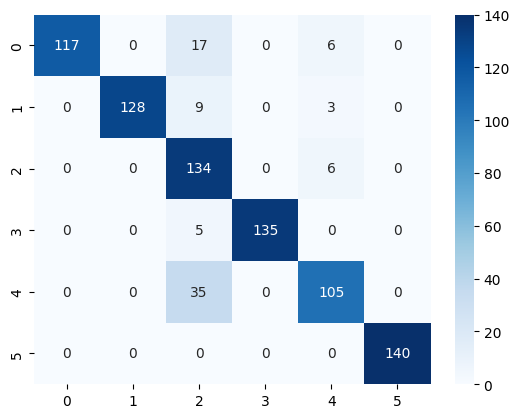

In [14]:
# Visualization:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues')

In [15]:
# Save Model & Vectorizer:
joblib.dump(svc_model, 'Emotions_model.pkl')
joblib.dump(vectorizer, 'TVectorizer.pkl')

['TVectorizer.pkl']

In [16]:
# Load Model & Predict Function:
def emotion_predict(text):
    text_clean = ntF.remove_special_characters(text)
    text_clean = ntF.remove_stopwords(text_clean)
    text_clean = text_clean.lower()

    SVC_model = joblib.load('Emotions_model.pkl')
    tf_idf = joblib.load('TVectorizer.pkl')

    text_vectorized = tf_idf.transform([text_clean])
    prediction = SVC_model.predict(text_vectorized)[0]
    return prediction

In [17]:
# Example Test
input = "I feel blessed and grateful for all the good things in my life."
print("Predicted_Emotion:", emotion_predict(input))

Predicted_Emotion: joy
